In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [5]:
phi = sym.symbols('phi')

f1 = sym.sin(phi) / phi
f2 = (sym.cos(phi)-1) / phi


In [6]:
print('Limit of sin(p)/p as p->0:')
print(sym.limit(f1,phi,0,dir='+-'))

print('Limit of (cos(p)-1)/p as p->0:')
print(sym.limit(f2,phi,0,dir='+-'))

Limit of sin(p)/p as p->0:
1
Limit of (cos(p)-1)/p as p->0:
0


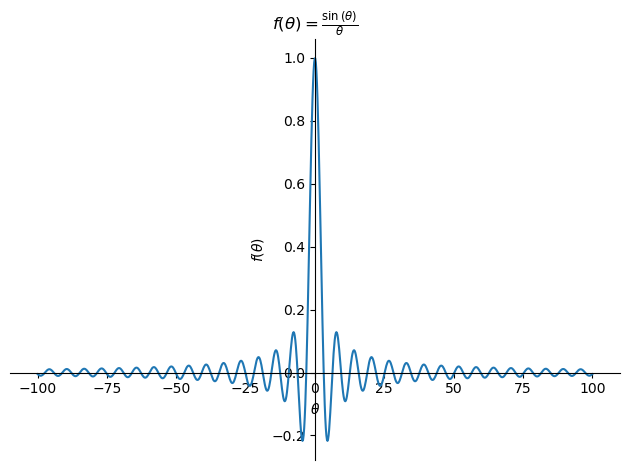

In [16]:
theta = sym.symbols('theta')

fx = sym.sin(theta) / theta

sym.plot(fx,(theta,-100,100),nb_of_points=1000,adaptive=False,
         ylable=None,title=f'$f(\\theta) = %s$'%sym.latex(fx));

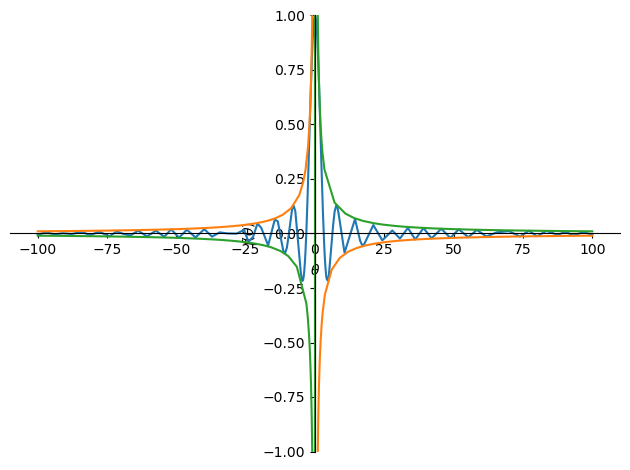

In [18]:
gx = -1/theta
hx = 1/theta

sym.plot(fx,gx,hx,(theta,-100,100),ylim=[-1,1])

<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/theta
<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in divide
  return sin(theta)/theta
<lambdifygenerated-21>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return theta**(-1.0)


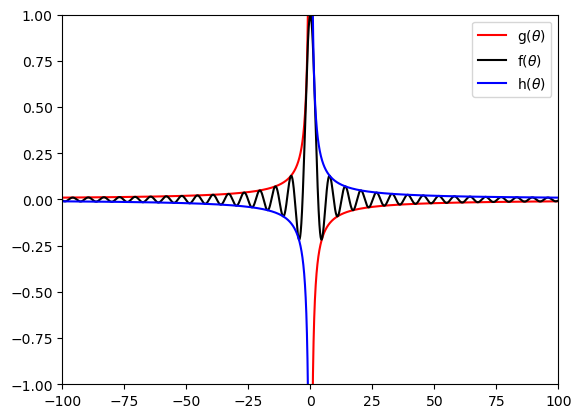

In [25]:
gFun = sym.lambdify(theta,gx)
fFun = sym.lambdify(theta,fx)
hFun = sym.lambdify(theta,hx)

xx = np.linspace(-100,100,10001)

plt.plot(xx,gFun(xx),'r',label='g($\\theta$)')
plt.plot(xx,fFun(xx),'k',label='f($\\theta$)')
plt.plot(xx,hFun(xx),'b',label='h($\\theta$)')

plt.ylim([-1,1])
plt.xlim(xx[[0,-1]])
plt.legend()
plt.show()

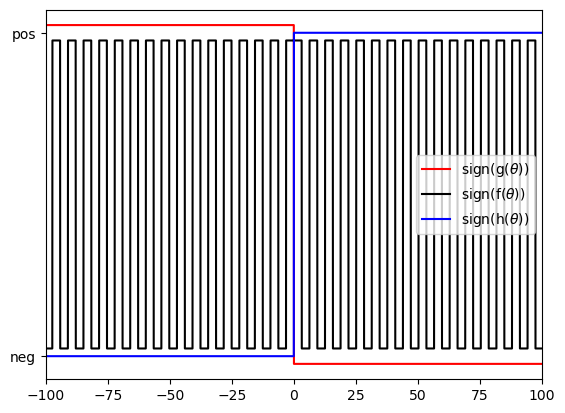

In [31]:
plt.plot(xx,np.sign(gFun(xx))*1.1,'r',label='sign(g($\\theta$))')
plt.plot(xx,np.sign(fFun(xx)),'k',label='sign(f($\\theta$))')
plt.plot(xx,np.sign(hFun(xx))*1.05,'b',label='sign(h($\\theta$))')

plt.ylim([-1.2,1.2])
plt.yticks([-1.05,1.05],['neg','pos'])
plt.xlim(xx[[0,-1]])
plt.legend()
plt.show()

In [32]:
print('Limit of g as t->oo:')
print(sym.limit(gx,theta,sym.oo,dir='-'))

print('Limit of f as t->oo:')
print(sym.limit(fx,theta,sym.oo,dir='-'))

print('Limit of g as t->oo:')
print(sym.limit(hx,theta,sym.oo,dir='-'))


Limit of g as t->oo:
0
Limit of f as t->oo:
0
Limit of g as t->oo:
0


<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in divide
  return tan(theta)/theta
<lambdifygenerated-30>:2: RuntimeWarning: invalid value encountered in divide
  return sin(theta)/theta


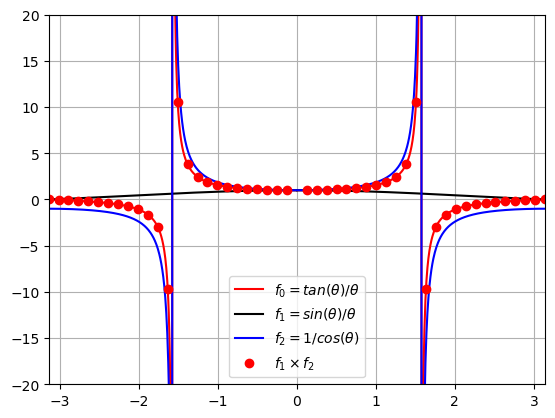

In [59]:
f0 = sym.tan(theta) / theta
f1 = sym.sin(theta) / theta
f2 = 1 / sym.cos(theta)

f0Fun = sym.lambdify(theta,f0)
f1Fun = sym.lambdify(theta,f1)
f2Fun = sym.lambdify(theta,f2)

xx = np.linspace(-np.pi,np.pi,1001)


plt.plot(xx,f0Fun(xx),'r',label=r'$f_0=tan(\theta)/\theta$')
plt.plot(xx,f1Fun(xx),'k',label=r'$f_1=sin(\theta)/\theta$')
plt.plot(xx,f2Fun(xx),'b',label=r'$f_2=1/cos(\theta$)')
plt.plot(xx[::20],f1Fun(xx[::20])*f2Fun(xx[::20]),'ro',label=r'$f_1\times f_2$')

plt.ylim([-20,20])
plt.xlim(xx[[1,-1]])
plt.legend()
plt.grid()
plt.show()

In [60]:
print('Value of f0 as t=0:')
print(f0.subs(theta,0))

print('Value of f1 as t=0:')
print(f1.subs(theta,0))

print('Value of f2 as t=0:')
print(f2.subs(theta,0))


Value of f0 as t=0:
nan
Value of f1 as t=0:
nan
Value of f2 as t=0:
1


In [61]:
print('Limit of f0 as t->0:')
print(sym.limit(f0,theta,0,dir='+-'))

print('Limit of f1 as t->0:')
print(sym.limit(f1,theta,0,dir='+-'))

print('Limit of f2 as t->0:')
print(sym.limit(f2,theta,0,dir='+-'))

Limit of f0 as t->0:
1
Limit of f1 as t->0:
1
Limit of f2 as t->0:
1


In [64]:
parts = [theta**2, sym.exp(-theta**2), sym.log(theta**2), sym.sin(theta)]

expr = 1
for p in parts:
    expr *= p

expr

theta**2*exp(-theta**2)*log(theta**2)*sin(theta)

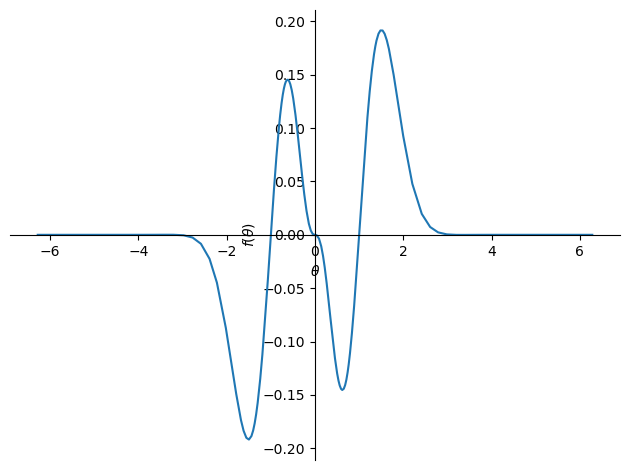

In [65]:
sym.plot(expr,(theta,-2*sym.pi,2*sym.pi))

In [66]:
print(expr.subs(theta,0))
print(sym.limit(expr,theta,0,dir='+-'))

nan
0


In [68]:
sym.calculus.util.continuous_domain(expr,theta,sym.Reals)

Union(Interval.open(-oo, 0), Interval.open(0, oo))

In [72]:
c = 1
for p in parts:
    print(f"Limit of {p} as t->0 is {sym.limit(p,theta,0,dir='+-')}")
    c *= sym.limit(p,theta,0,dir='+-')

c

Limit of theta**2 as t->0 is 0
Limit of exp(-theta**2) as t->0 is 1
Limit of log(theta**2) as t->0 is -oo
Limit of sin(theta) as t->0 is 0


nan